# SVM From Scratch - Simplified

Demonstrating SVM concepts using sklearn.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

---
## Linear SVM

In [2]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=0.8)

svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

print(f'Support vectors: {len(svm.support_vectors_)}')
print(f'Accuracy: {svm.score(X, y)*100:.2f}%')

Support vectors: 2
Accuracy: 100.00%


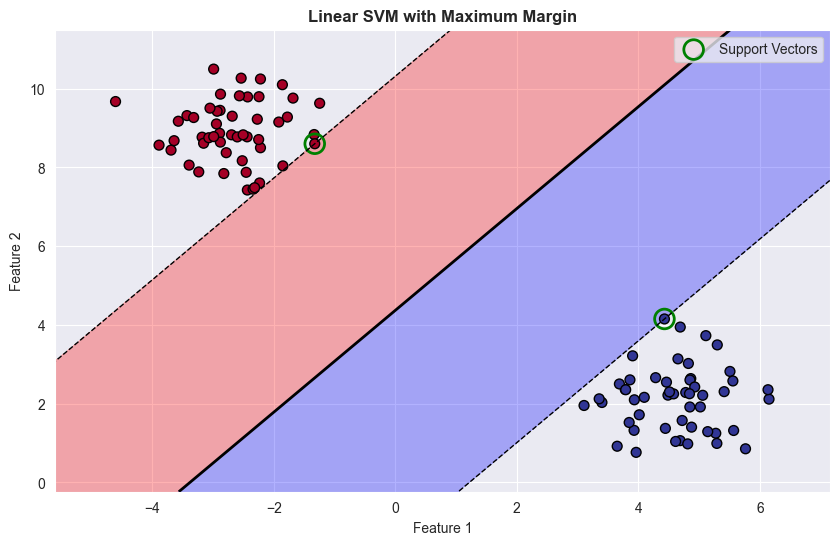

In [3]:
# Visualize
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['red', 'blue'])
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linewidths=[1, 2, 1],
           linestyles=['--', '-', '--'], colors='black')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=50)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
           s=200, facecolors='none', edgecolors='green', linewidth=2, label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM with Maximum Margin', fontweight='bold')
plt.legend()
plt.show()

---
## Effect of C

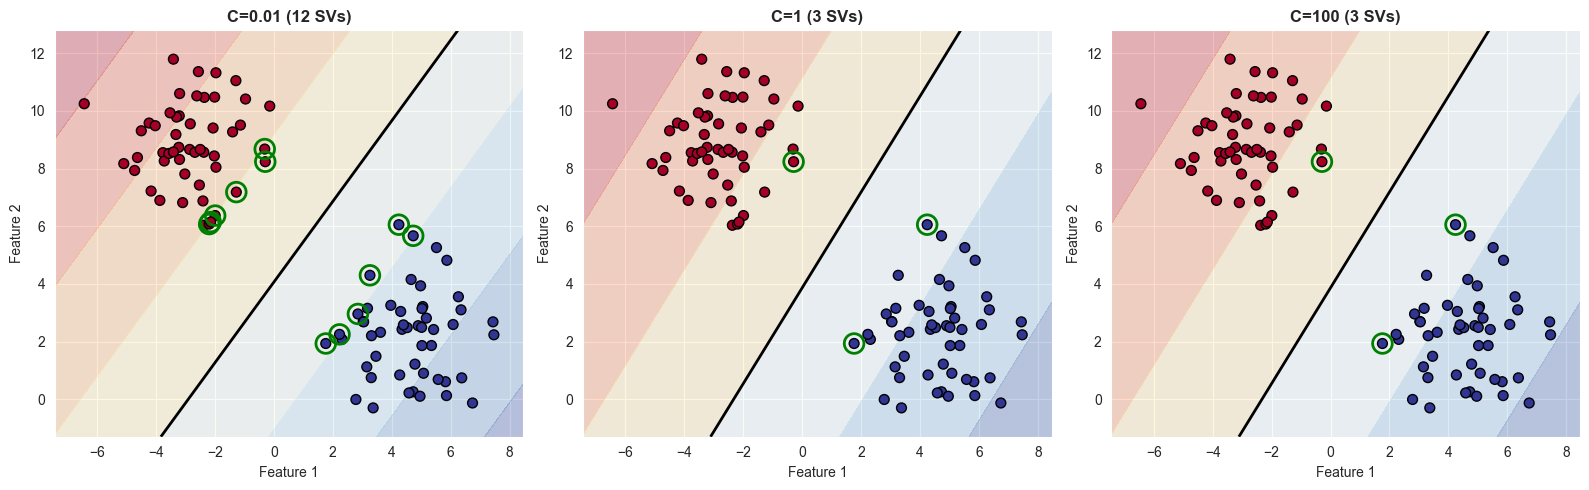

Low C → larger margin, more SVs
High C → smaller margin, fewer SVs


In [4]:
X_n, y_n = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
for idx, C in enumerate([0.01, 1, 100]):
    svm_c = SVC(kernel='linear', C=C)
    svm_c.fit(X_n, y_n)
    
    x_min, x_max = X_n[:, 0].min() - 1, X_n[:, 0].max() + 1
    y_min, y_max = X_n[:, 1].min() - 1, X_n[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = svm_c.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    axes[idx].contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    axes[idx].scatter(X_n[:, 0], X_n[:, 1], c=y_n, cmap='RdYlBu', edgecolors='k', s=50)
    axes[idx].scatter(svm_c.support_vectors_[:, 0], svm_c.support_vectors_[:, 1],
                     s=200, facecolors='none', edgecolors='green', linewidth=2)
    
    axes[idx].set_title(f'C={C} ({len(svm_c.support_vectors_)} SVs)', fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print('Low C → larger margin, more SVs')
print('High C → smaller margin, fewer SVs')

---
## Summary

**Key Insights:**
- SVM maximizes margin to nearest points
- Support vectors define boundary
- C controls margin vs violations

**Key Point:** "SVM finds the hyperplane that maximizes margin to support vectors. C balances margin width vs classification errors."